In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px 
import datetime
import seaborn as sns

In [2]:
sd_21 = pd.read_excel(r'C:\Users\godwi\Data_Science_ML\Exploratory_Analysis_Pandas\tonia_datasets\company_sales_data.xlsx','2021', parse_dates=[1])
sd_22 = pd.read_excel(r'C:\Users\godwi\Data_Science_ML\Exploratory_Analysis_Pandas\tonia_datasets\company_sales_data.xlsx','2022', parse_dates=[1])
sd_23 = pd.read_excel(r'C:\Users\godwi\Data_Science_ML\Exploratory_Analysis_Pandas\tonia_datasets\company_sales_data.xlsx','2023',parse_dates=[1])

In [3]:
print(sd_21.shape)
print(sd_22.shape)
print(sd_23.shape)

(19500, 13)
(21642, 13)
(22189, 13)


In [4]:
sd_21.head(2)

,Salesman,Date,Vch/Bill No,Customer,Item Details,Category,Cat LV1,Cat LV2,Cat LV3,QTY,Unit,Price,Amount
0,Gbolahan Alubankudi,2021-03-11 00:00:00,DST/1936,HENOX TECHNOLOGIES,HP 450 G7 (2D347EA),HP NEW - CONSUMER,HP channel,Laptop,Commercial,100.0,Pcs.,355000.0,35500000.0
1,GIDEON ONONUGBOR,2021-04-19 00:00:00,DST/2874,Blessing Computers,HP 440 G7 (2D348EA),HP NEW - CONSUMER,HP channel,Laptop,Commercial,55.0,Pcs.,370000.0,20350000.0


In [5]:
sd_22.head(2)

,Salesman,Date,Vch/Bill No,Customer,Item Details,Category,Cat LV1,Cat LV2,Cat LV3,QTY,Unit,Price,Amount
0,HQ Ground Floor,2022-01-02,DST/789,NIRAN CUSTOMER,IPHONE 13 128GB,MOBILE,Mobile and Tablets,Mobile phones,Apple,1,Pcs.,515000.0,515000.0
1,Ikhide Inyemifuokha,2022-01-03,DST/1,Kabiru Umar,HP 15t-DW200 (8VX87AV),COMPUTING,HP NEW - CONSUMER,Laptop,Consumer,1,Pcs.,372000.0,372000.0


In [6]:
sd_23.head(2)

,Salesman,Date,Vch/Bill No,Customer,Item Details,Category,CAT LV1,Cat LV2,Cat LV3,QTY,Unit,Price,Amount
0,IZUCHUKWU UWANDU,2023-01-02,DST/4,YOMILINCON BRAND ENTERPRICES,AMAZON KINDLE PAPERWHITE 2018 32GB PLUM,MOBILE DEVICES & ACCESSORIES,TABLETS,Tablets,,1,Pcs.,81300.0,81300.0
1,BLESSING WISDOM,2023-01-02,DST/5,Akinlotan Olayinka,HP 15 Dw1212nia (258K3EA),COMPUTING,HP NEW - CONSUMER,Laptop,non channel,1,Pcs.,155000.0,155000.0


In [7]:
sd_21['Date']= pd.to_datetime(sd_21['Date'],errors='coerce')
sd_22['Date']= pd.to_datetime(sd_22['Date'],errors='coerce')
sd_23['Date']= pd.to_datetime(sd_23['Date'],errors='coerce')

In [8]:
# merge the dataset
sd = pd.concat([sd_21,sd_22,sd_23],join='inner')

In [9]:
sd.head()

,Salesman,Date,Vch/Bill No,Customer,Item Details,Category,Cat LV2,Cat LV3,QTY,Unit,Price,Amount
0,Gbolahan Alubankudi,2021-03-11,DST/1936,HENOX TECHNOLOGIES,HP 450 G7 (2D347EA),HP NEW - CONSUMER,Laptop,Commercial,100.0,Pcs.,355000.0,35500000.0
1,GIDEON ONONUGBOR,2021-04-19,DST/2874,Blessing Computers,HP 440 G7 (2D348EA),HP NEW - CONSUMER,Laptop,Commercial,55.0,Pcs.,370000.0,20350000.0
2,PAMELA MBANUGO,2021-04-30,DST/3132,HENRI HILLS INTEGRATED CONCEPT LTD,HP 440 G7 (2D348EA),HP NEW - CONSUMER,Laptop,Commercial,54.0,Pcs.,370000.0,19980000.0
3,GIDEON ONONUGBOR,2021-03-26,DST/2327,KONGA ONLINE SHOPPING LTD,HP 255 G7 (197U3EA),HP NEW - CONSUMER,Laptop,Commercial,100.0,Pcs.,177500.0,17750000.0
4,MD'S SALE,2021-01-20,DST/543,PARK N SHOP,HP Pav 15 DQ1017NIA (2Q870EA),HP NEW - CONSUMER,Laptop,Consumer,50.0,Pcs.,315000.0,15750000.0


In [10]:
sd['Year']= sd['Date'].dt.to_period('y')
sd['Month']= pd.DatetimeIndex(sd['Date']).month

In [11]:
Qtr = []
for i in sd.Month:
    if i in [1,2,3]:
        Qtr.append('Q1')
    elif i in [4,5,6]:
        Qtr.append('Q2')
    elif i in [7,8,9]:
        Qtr.append('Q3')
    else:
        Qtr.append('Q4')

In [12]:
sd_new =sd.join(pd.DataFrame(Qtr)).rename({0:'Qtr'},axis =1).fillna(0)

merge2.Year.value_counts()

In [13]:
sd_new_01 = sd_new.loc[:,['Customer','Category','QTY','Amount','Year','Month']]

In [14]:
sd_new_01.Customer = sd_new_01.Customer.astype('object')
sd_new_01.Month = sd_new_01.Month.astype('int')

In [15]:
sd_new_01.isnull().sum()

Customer    0
Category    0
QTY         0
Amount      0
Year        0
Month       0
dtype: int64

In [16]:
sd_new_01.dtypes

Customer     object
Category     object
QTY         float64
Amount      float64
Year         object
Month         int32
dtype: object

In [17]:
sd_new_01.Customer.value_counts()

Customer
                                2233
MikiEnt Solutions                907
Dreamworks                       775
YOMILINCON BRAND ENTERPRICES     755
DREAMWORKS WORKSHOP              619
                                ... 
DAINI ADETOLA                      1
MR OWOLABI                         1
JAMES MOSES                        1
KAYODE OMOTUNDE                    1
ITUNU OLAPOSI                      1
Name: count, Length: 17422, dtype: int64

In [18]:
sd_new_01[sd_new_01.Customer == 'MikiEnt Solutions']

,Customer,Category,QTY,Amount,Year,Month
8,MikiEnt Solutions,MOBILE DEVICES & ACCESSORIES,2.0,1800.0,2023,1
21,MikiEnt Solutions,"SMART DEVICES, SECURITY AND WIFI",1.0,42800.0,2023,1
29,MikiEnt Solutions,COMPUTING,1.0,8600.0,2022,1
113,MikiEnt Solutions,MOBILE DEVICES & ACCESSORIES,1.0,1200.0,2023,1
150,MikiEnt Solutions,CONSUMER ELECTRONICS,1.0,8800.0,2022,1
...,...,...,...,...,...,...
21550,MikiEnt Solutions,CONSUMER ELECTRONICS,1.0,249300.0,2023,11
21551,MikiEnt Solutions,"SMART DEVICES, SECURITY AND WIFI",1.0,96500.0,2023,11
21553,MikiEnt Solutions,"SMART DEVICES, SECURITY AND WIFI",1.0,10200.0,2023,11
21621,MikiEnt Solutions,"SMART DEVICES, SECURITY AND WIFI",5.0,275000.0,2023,11


In [32]:
def ocur (x):
    for i in sd_new_01.Customer:
        sd_new_01.Customer.value_counts()
        return (x)

In [33]:
print(ocur ('MikiEnt Solutions'))

MikiEnt Solutions


In [44]:
sd_new_01['Number']= sd_new_01.Customer.apply(lambda x: str(x)+'nn')

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
le= LabelEncoder()
sc= StandardScaler()

In [ ]:
scale_col= ['Amount']

In [ ]:
scale_col_pipe =Pipeline([
    ('scale',sc)
])

In [ ]:
trans = ColumnTransformer([
    ('scale',sc,scale_col)
],remainder='passthrough')

In [ ]:
trans.fit_transform(merge3)

array([[ 31.8263142 ,   6.        , 100.        ],
       [  0.17788335,   9.        ,   1.        ],
       [ -0.21445406,  11.        ,   1.        ],
       ...,
       [ -0.16723245,  11.        ,   1.        ],
       [  0.11863018,   3.        ,   1.        ],
       [ -0.28800036,   3.        ,   1.        ]])

In [ ]:
transformer =pd.DataFrame(trans.fit_transform(merge3),columns=['Amount','Category','QTY'])

In [ ]:
transformer

,Amount,Category,QTY
0,31.826314,6,100.0
1,0.177883,9,1.0
2,-0.214454,11,1.0
3,18.121191,6,55.0
4,0.048521,2,1.0
...,...,...,...
63326,-0.285196,11,1.0
63327,-0.285558,11,1.0
63328,-0.167232,11,1.0
63329,0.11863,3,1.0


In [ ]:
merge3.Category= merge3.Category.astype('object')

In [ ]:
merge3.dtypes

Category     object
QTY         float64
Amount      float64
dtype: object

In [ ]:
merge3.isna().any()

Category    False
QTY         False
Amount      False
dtype: bool

In [ ]:
merge3.Category.value_counts()

Category
11    18925
2     16361
18     9263
3      8593
6      2651
15     2210
1      1709
13      910
9       886
12      704
16      523
5       428
0        83
17       30
4        24
7        14
14       13
8         2
10        2
Name: count, dtype: int64

In [ ]:
transformer

,Amount,Category,QTY
0,31.826314,6,100.0
1,0.177883,9,1.0
2,-0.214454,11,1.0
3,18.121191,6,55.0
4,0.048521,2,1.0
...,...,...,...
63326,-0.285196,11,1.0
63327,-0.285558,11,1.0
63328,-0.167232,11,1.0
63329,0.11863,3,1.0


c:\Users\godwi\anaconda3\envs\ML\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\godwi\anaconda3\envs\ML\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\godwi\anaconda3\envs\ML\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<AxesSubplot:xlabel='QTY', ylabel='Amount'>

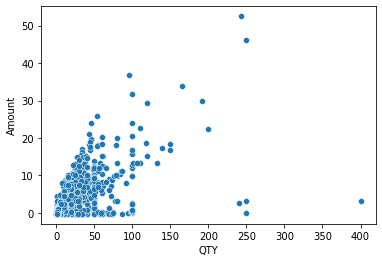

In [ ]:
sns.scatterplot(transformer.QTY, transformer.Amount)

In [ ]:
transformer.Category.value_counts()

Category
11         18925
2          16361
18          9263
3           8593
6           2651
15          2210
1           1709
13           910
9            886
12           704
16           523
5            428
unknown       83
17            30
4             24
7             14
14            13
8              2
10             2
Name: count, dtype: int64

In [ ]:
transformer.Category=le.fit_transform(transformer.Category)

TypeError: Encoders require their input argument must be uniformly strings or numbers. Got ['int', 'str']

In [ ]:
from sklearn.decomposition import PCA


In [ ]:
pca = PCA(n_components=2)

In [ ]:
merge_pca= pca.fit_transform(transformer)

ValueError: could not convert string to float: 'unknown'

In [ ]:
merge_pca

array([[ 3.51816369e+07,  1.68381060e+01],
       [ 1.96636894e+05,  7.94794185e-01],
       [-2.37063106e+05,  2.58783139e+00],
       ...,
       [-1.84863106e+05,  2.61267094e+00],
       [ 1.31136894e+05, -5.23461864e+00],
       [-3.18363106e+05, -5.44851472e+00]])

In [ ]:
merge_pca= pd.DataFrame(merge_pca, columns=['pca1','pca2'])

In [ ]:
merge_pca

,pca1,pca2
0,3.518164e+07,16.838106
1,1.966369e+05,0.794794
2,-2.370631e+05,2.587831
3,2.003164e+07,8.540426
4,5.363689e+04,-6.271205
...,...,...
63326,-3.152631e+05,2.550620
63327,-3.156631e+05,2.550429
63328,-1.848631e+05,2.612671
63329,1.311369e+05,-5.234619


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
km =KMeans(n_clusters=4, max_iter=300, random_state=42)
km.fit_transform(merge_pca)
final_kmeans = pd.concat([merge_pca , pd.DataFrame({'clusters' : km.labels_})],axis = 1)
final_kmeans  

c:\Users\godwi\anaconda3\envs\ML\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,pca1,pca2,clusters
0,3.518164e+07,16.838106,3
1,1.966369e+05,0.794794,0
2,-2.370631e+05,2.587831,0
3,2.003164e+07,8.540426,3
4,5.363689e+04,-6.271205,0
...,...,...,...
63326,-3.152631e+05,2.550620,0
63327,-3.156631e+05,2.550429,0
63328,-1.848631e+05,2.612671,0
63329,1.311369e+05,-5.234619,0


c:\Users\godwi\anaconda3\envs\ML\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\godwi\anaconda3\envs\ML\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\godwi\anaconda3\envs\ML\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\godwi\anaconda3\envs\ML\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if

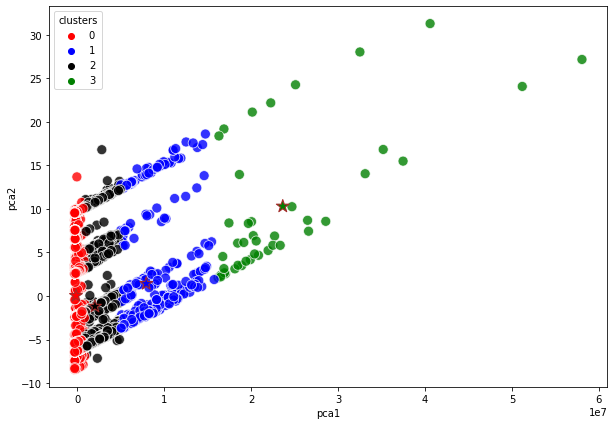

In [ ]:
c =['red', 'blue',"black",'green']
fig, ax = plt.subplots(figsize =( 10, 7))
sns.scatterplot(data = final_kmeans, x= 'pca1', y='pca2', palette= c, hue = 'clusters',alpha=0.8, s = 100)
sns.scatterplot(x= km.cluster_centers_[:, 0], y=km.cluster_centers_[:, 1], 
                hue= range(4), palette=c, s=180, ec='brown', marker = "*",  legend = False, ax=ax)
plt.grid(False)
plt.show()

In [ ]:
segment = merge2.loc[:, ['Customer','Category','Amount']].join(final_kmeans.clusters)

In [ ]:
segment.to_csv('segment.csv')